reimplementation mnist example included with lasagne

In [1]:
import sys

sys.path.append('../../')

In [ ]:
from models import Sequential
from datasets import load_mnist

X_train, y_train, X_val, y_val, X_test, y_test =load_mnist()

In [26]:
from lasagne.layers import DenseLayer, DropoutLayer
from lasagne.nonlinearities import rectify, softmax
from lasagne.objectives import categorical_crossentropy
from lasagne.updates import nesterov_momentum

import theano.tensor as T

#create the model
mlp = Sequential(input_shape=(None,)+X_train.shape[1:],input_var = T.tensor4('inputs'), 
                 output_var = T.ivector('targets'))
#add layers
mlp.add(DenseLayer,lambda1=1e-4,lambda2=1e-6,num_units=800,nonlinearity=rectify)
mlp.add(DropoutLayer,p=0.5)
mlp.add(DenseLayer,lambda1=1e-4,lambda2=1e-6,num_units=800,nonlinearity=rectify)
mlp.add(DropoutLayer,p=0.5)
mlp.add(DenseLayer,num_units=10,nonlinearity=softmax)

#set loss and optimizer and compile
mlp.compile(loss_fn = categorical_crossentropy,
              optimizer = nesterov_momentum, learning_rate=0.01, momentum=0.9)


In [27]:
#train network
mlp.fit(X_train,y_train,validation_data=(X_val,y_val),n_epochs=30)

Epoch 1 of 30 took 16.396s
  training loss:		4.285633
  validation loss:		3.684360
Epoch 2 of 30 took 18.253s
  training loss:		3.526825
  validation loss:		3.194744
Epoch 3 of 30 took 21.004s
  training loss:		3.047502
  validation loss:		2.764335
Epoch 4 of 30 took 19.072s
  training loss:		2.629916
  validation loss:		2.381984
Epoch 5 of 30 took 19.556s
  training loss:		2.254990
  validation loss:		2.034885
Epoch 6 of 30 took 19.268s
  training loss:		1.923005
  validation loss:		1.728175
Epoch 7 of 30 took 17.097s
  training loss:		1.628589
  validation loss:		1.454159
Epoch 8 of 30 took 14.711s
  training loss:		1.373002
  validation loss:		1.218512
Epoch 9 of 30 took 14.618s
  training loss:		1.150080
  validation loss:		1.016349
Epoch 10 of 30 took 14.600s
  training loss:		0.963845
  validation loss:		0.851166
Epoch 11 of 30 took 14.529s
  training loss:		0.813557
  validation loss:		0.712968
Epoch 12 of 30 took 14.576s
  training loss:		0.694551
  validation loss:		0.604943
E

accuracy: 0.9749


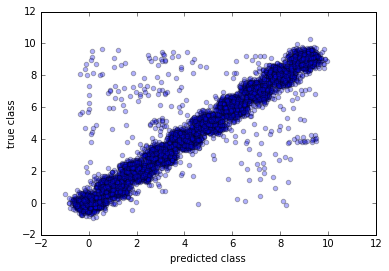

In [28]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

pred = np.argmax(mlp.predict(X_test),axis=1)

print 'accuracy: '+str(np.mean(pred==y_test))

plt.xlabel('predicted class')
plt.ylabel('true class')

#add jitter (overlapping points)
plt.scatter(pred+np.random.randn(X_test.shape[0])*0.3,
            y_test+np.random.randn(X_test.shape[0])*0.3,alpha=0.3)

same experiment with convolutional neural network

In [31]:
from lasagne.init import GlorotUniform
from lasagne.layers import Conv2DLayer,MaxPool2DLayer
    
cnn = Sequential(input_shape=(None,)+X_train.shape[1:],
                 input_var = T.tensor4('inputs'),
                 output_var = T.ivector('targets'))

cnn.add(Conv2DLayer, num_filters=32, filter_size=(5, 5),
            nonlinearity= rectify,
            W=GlorotUniform())
cnn.add(MaxPool2DLayer, pool_size=(2, 2))
cnn.add(Conv2DLayer , num_filters=32, filter_size=(5, 5),
            nonlinearity= rectify)           
cnn.add(MaxPool2DLayer, pool_size=(2, 2))
cnn.add(DropoutLayer, p=.5)
cnn.add(DenseLayer, num_units=256, nonlinearity= rectify)
cnn.add(DropoutLayer, p=.5)
cnn.add(DenseLayer, num_units=10, nonlinearity= softmax)
                 
cnn.compile(loss_fn = categorical_crossentropy,
              optimizer = nesterov_momentum, learning_rate=0.01, momentum=0.9) 

In [32]:
cnn.fit(X_train,y_train,validation_data=(X_val,y_val),n_epochs=30)

Epoch 1 of 30 took 94.304s
  training loss:		0.688934
  validation loss:		0.120162
Epoch 2 of 30 took 97.220s
  training loss:		0.220955
  validation loss:		0.084618
Epoch 3 of 30 took 94.854s
  training loss:		0.165698
  validation loss:		0.066539
Epoch 4 of 30 took 95.529s
  training loss:		0.132558
  validation loss:		0.055175
Epoch 5 of 30 took 94.087s
  training loss:		0.115843
  validation loss:		0.052029
Epoch 6 of 30 took 95.535s
  training loss:		0.102693
  validation loss:		0.048076
Epoch 7 of 30 took 91.654s
  training loss:		0.093610
  validation loss:		0.043801
Epoch 8 of 30 took 76.832s
  training loss:		0.087998
  validation loss:		0.041828
Epoch 9 of 30 took 79.227s
  training loss:		0.078512
  validation loss:		0.040614
Epoch 10 of 30 took 94.218s
  training loss:		0.078655
  validation loss:		0.037884
Epoch 11 of 30 took 97.207s
  training loss:		0.074146
  validation loss:		0.035112
Epoch 12 of 30 took 94.805s
  training loss:		0.068837
  validation loss:		0.033790
E

accuracy: 0.9937


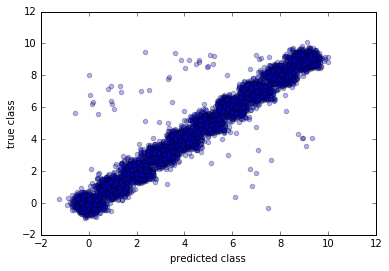

In [33]:
pred = np.argmax(cnn.predict(X_test),axis=1)

print 'accuracy: '+str(np.mean(pred==y_test))

plt.xlabel('predicted class')
plt.ylabel('true class')

#add jitter (overlapping points)
plt.scatter(pred+np.random.randn(X_test.shape[0])*0.3,
            y_test+np.random.randn(X_test.shape[0])*0.3,alpha=0.3)